In [1]:
import numpy as np 
from tensorflow.keras import utils
from astroNN.datasets import load_galaxy10 #load dataset galaxy
import matplotlib.pyplot as plt
import sys
sys.path.append('library_processing_image')  # Ganti dengan path ke folder Anda
from library_processing_image.geometri_transform import rotasi, flip_horizontal, flip_vertical, flip_horizontal_vertical
from library_processing_image.spasial_transform import zoom_in, zoom_out
from library_processing_image.math_method import normalisasi_image
from library_processing_image.arsitektur_cnn import Resnet50,efficientnet80,InterceptionV3

2025-01-05 19:10:54.134405: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-05 19:10:54.411636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-05 19:10:54.686632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736079054.937200   10758 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736079055.001658   10758 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 19:10:55.513350: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
#unduh dan muat dataset galaxy 10

images, labels = load_galaxy10()

/home/pejalan_sunyi/.astroNN/datasets/Galaxy10_DECals.h5 was found!


/home/pejalan_sunyi/.astroNN/datasets/Galaxy10_DECals.h5 was found!


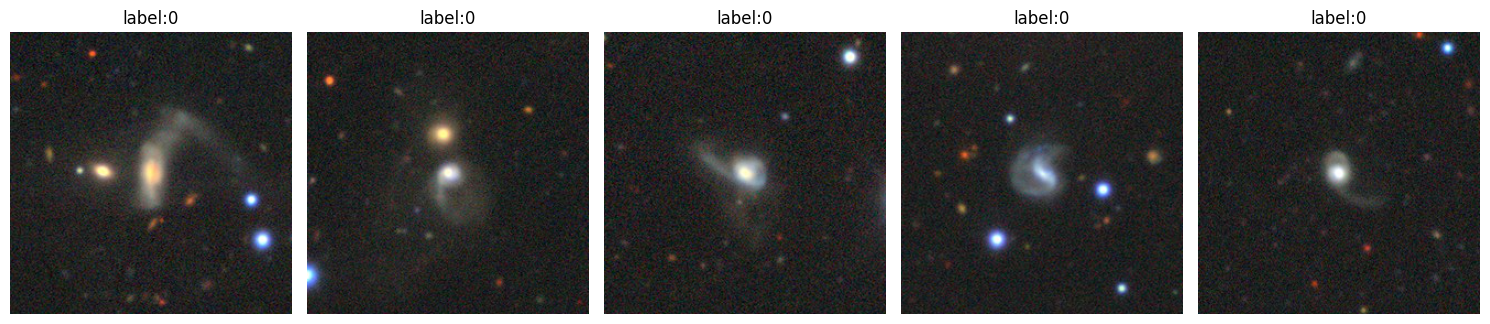

In [3]:

num_samples = 5 #jumlah sampel yang akan ditampilkan
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(images[i])
    plt.title(f'label:{labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [3]:
imag = []
labe = []

for i in range(len(images)):
    if labe.count(labels[i]) < 5:
        imag.append(images[i])
        labe.append(int(labels[i]))

In [4]:
imag = np.array(imag)

In [5]:
imag

array([[[[ 68,  19,  23],
         [ 58,  17,  33],
         [ 40,  16,  40],
         ...,
         [ 51,  46,  43],
         [ 40,  41,  33],
         [ 28,  38,  30]],

        [[ 61,  40,  37],
         [ 52,  43,  44],
         [ 29,  39,  41],
         ...,
         [ 28,  30,  42],
         [ 28,  32,  35],
         [ 33,  40,  33]],

        [[ 30,  31,  25],
         [ 24,  41,  33],
         [ 15,  45,  33],
         ...,
         [ 21,  35,  48],
         [ 25,  35,  45],
         [ 37,  41,  40]],

        ...,

        [[ 28,  32,  35],
         [ 27,  31,  32],
         [ 42,  44,  43],
         ...,
         [ 20,  37,  27],
         [ 19,  40,  21],
         [ 27,  50,  24]],

        [[ 22,  36,  37],
         [ 19,  29,  30],
         [ 33,  37,  38],
         ...,
         [ 17,  35,  35],
         [ 17,  35,  21],
         [ 26,  45,  17]],

        [[ 18,  39,  40],
         [ 14,  28,  29],
         [ 24,  30,  30],
         ...,
         [ 20,  35,  56],
        

In [5]:
labe = np.array(labe)

In [7]:
labe

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [8]:
labels_ = [int(i) for i in labels]

In [9]:
set(labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

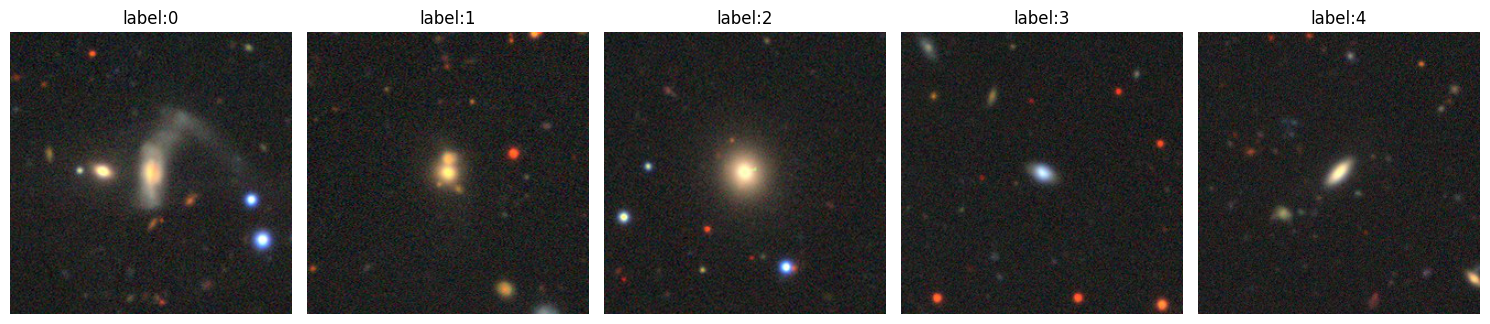

In [10]:
label_sudah = []
plt.figure(figsize=(15, 5))
sample = 0
count = 0
while sample < 5 :
    if labels[count] not in label_sudah:
     
        plt.subplot(1, 5, sample+1)
        plt.imshow(images[count])
        plt.title(f'label:{labels[count]}')
        plt.axis('off')
        label_sudah.append(labels[count])
        sample += 1
    count += 1

plt.tight_layout()
plt.show()

In [11]:
images[0].shape[:2]

(256, 256)

In [12]:
images_rotasi = rotasi(images[0], 45)

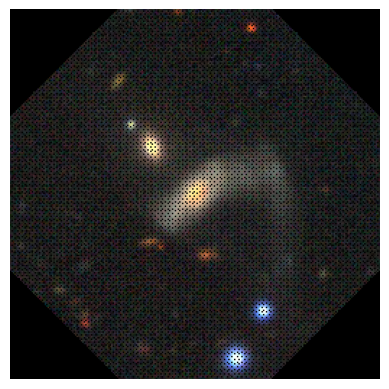

In [13]:
plt.imshow(images_rotasi)
plt.axis('off')
plt.show()

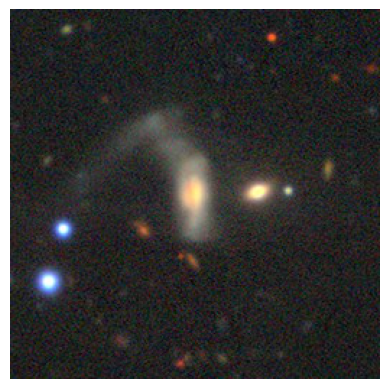

In [14]:
images_flip_hori = flip_horizontal(images[0])
plt.imshow(images_flip_hori)
plt.axis('off')
plt.show()

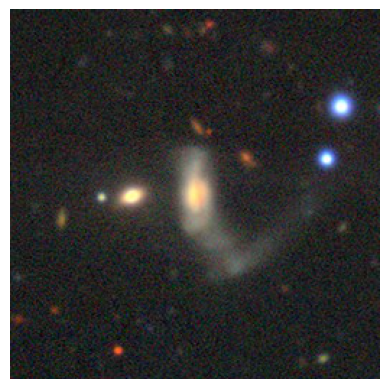

In [15]:
images_flip_verti = flip_vertical(images[0])
plt.imshow(images_flip_verti)
plt.axis('off')
plt.show()

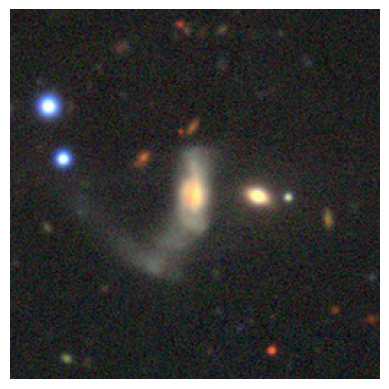

In [16]:
images_flip_verti_hori = flip_horizontal_vertical(images[0])
plt.imshow(images_flip_verti_hori)
plt.axis('off')
plt.show()

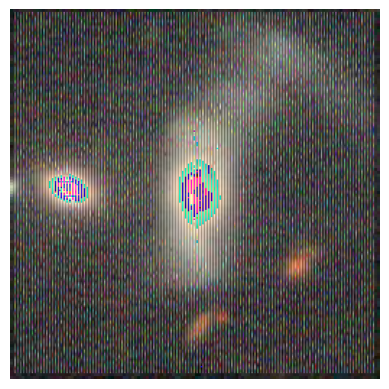

In [17]:
zoom_in_image = zoom_in(images[0],2)
plt.imshow(zoom_in_image)
plt.axis('off')
plt.show()

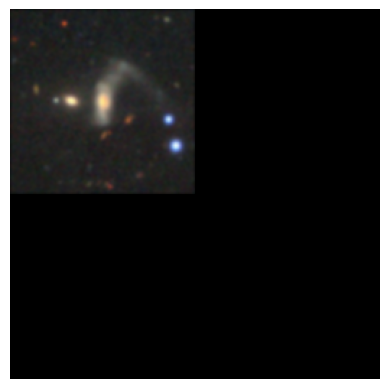

In [18]:
zoom_out_image = zoom_out(images[0],2)
plt.imshow(zoom_out_image)
plt.axis('off')
plt.show()

In [6]:
image_data_aug = []
label = []
# aug rotate 
deg = [15,45,90,105,135,180,195,225,270,285,315]
for i in range(len(imag)):
    for de in deg:
        im_rot = rotasi(imag[i],de)
        image_data_aug.append(im_rot)
        label.append(int(labe[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [7]:
#flip_aug
for i in range(len(imag)):
    image_flip_hori = flip_horizontal(imag[i])
    images_flip_verti = flip_vertical(imag[i])
    images_flip_verti_hori = flip_horizontal_vertical(imag[i])
    image_data_aug.append(image_flip_hori)
    image_data_aug.append(images_flip_verti)
    image_data_aug.append(images_flip_verti_hori)
    label.append(int(labe[i]))
    label.append(int(labe[i]))
    label.append(int(labe[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [8]:
#aug zomm_in
scala = [2,5,10]
for i in range(len(imag)):
    for sc in scala:
        im_zoom_in = zoom_in(imag[i],sc)
        image_data_aug.append(im_zoom_in)
        label.append(int(labe[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [9]:
#aug zomm_out
scala = [2,5,10]
for i in range(len(imag)):
    for sc in scala:
        im_zoom_out = zoom_out(imag[i],sc)
        image_data_aug.append(im_zoom_out)
        label.append(int(labe[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [24]:
for i in range(len(imag)):
    for de in deg:
        im_rot = rotasi(imag[i],de)
        im_rot_hori = flip_horizontal(im_rot)
        im_rot_verti = flip_vertical(im_rot)
        im_rot_hori_verti = flip_horizontal_vertical(im_rot)
        
        image_data_aug.append(im_rot_hori)
        image_data_aug.append(im_rot_verti)
        image_data_aug.append(im_rot_hori_verti)
        
        label.append(int(labe[i]))
        label.append(int(labe[i]))
        label.append(int(labe[i]))
        
        for sc in scala:
            im_zoom_in_rot = zoom_in(im_rot,sc)
            im_zoom_out_rot = zoom_out(im_rot,sc)
            im_zoom_in = zoom_in(imag[i],sc)
            im_zoom_out = zoom_out(imag[i],sc)
            
            image_data_aug.append(im_zoom_in_rot)
            image_data_aug.append(im_zoom_out_rot)
            
            im_rot_zoom_in_hori_rot = flip_horizontal(im_zoom_in_rot)
            im_rot_zoom_in_verti_rot = flip_vertical(im_zoom_in_rot)
            im_rot_zoom_in_hori_verti_rot = flip_horizontal_vertical(im_zoom_in_rot)
            im_zoom_in_hori = flip_horizontal(im_zoom_in)
            im_zoom_in_verti = flip_vertical(im_zoom_in)
            im_zoom_in_hori_verti = flip_horizontal_vertical(im_zoom_in)
            
            image_data_aug.append(im_rot_zoom_in_hori_rot)
            image_data_aug.append(im_rot_zoom_in_verti_rot)
            image_data_aug.append(im_rot_zoom_in_hori_verti_rot)
            image_data_aug.append(im_zoom_in_hori)
            image_data_aug.append(im_zoom_in_verti)
            image_data_aug.append(im_zoom_in_hori_verti)
            
            im_rot_zoom_out_hori_rot = flip_horizontal(im_zoom_out_rot)
            im_rot_zoom_out_verti_rot = flip_vertical(im_zoom_out_rot)
            im_rot_zoom_out_hori_verti_rot = flip_horizontal_vertical(im_zoom_out_rot)
            im_zoom_out_hori = flip_horizontal(im_zoom_out)
            im_zoom_out_verti = flip_vertical(im_zoom_out)
            im_zoom_out_hori_verti = flip_horizontal_vertical(im_zoom_out)
            
            image_data_aug.append(im_rot_zoom_out_hori_rot)
            image_data_aug.append(im_rot_zoom_out_verti_rot)
            image_data_aug.append(im_rot_zoom_out_hori_verti_rot)
            image_data_aug.append(im_zoom_out_hori)
            image_data_aug.append(im_zoom_out_verti)
            image_data_aug.append(im_zoom_out_hori_verti)
            
            
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
            label.append(int(labe[i]))
    
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [11]:
print(image_data_aug)


[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [24]:
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 

In [10]:
import gc

In [11]:
del images

In [ ]:
gc.collect()

In [12]:
data_aug = np.array(image_data_aug)
label = np.array(label)

In [13]:
#gabungkan data
data_image = np.concatenate((imag,data_aug))
labels_ = np.concatenate((labe,label))

In [14]:
def normalisasi_image(image):
    """
    Melakukan normalisasi citra RGB per channel.
    
    Parameters:
    - image: numpy array dengan shape (H, W, 3)
    
    Returns:
    - normalized_image: numpy array dengan shape (H, W, 3), hasil normalisasi
    """
    # Hitung mean dan std untuk setiap channel (R, G, B)
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    
    # Normalisasi tiap channel
    normalized_image = (image - mean) / std
    
    return normalized_image


In [15]:
#normalisasi semua image

for i in range(len(data_image)):
    data_image[i] = normalisasi_image(data_image[i])

In [16]:
data_image

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0, 255,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [255,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0, InceptionV3

In [24]:
def Resnet50():
    # Load ResNet-50 pre-trained tanpa fully connected layer (include_top=False)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Tambahkan lapisan fully connected untuk klasifikasi morfologi galaksi
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)  # 3 kelas: elliptical, spiral, irregular

    # Buat model akhir
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    return model
    

def efficientnet80():
    # Load EfficientNetB0 pre-trained tanpa fully connected layer
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Tambahkan lapisan fully connected
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    # Buat model akhir
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    return model

def InterceptionV3():
    # Load InceptionV3 pre-trained tanpa fully connected layer
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    # Tambahkan lapisan fully connected
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    # Buat model akhir
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    return model


In [23]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_image, labels_, test_size=0.2, random_state=42)

In [ ]:
#model resnet 50

model_resnet50 = Resnet50()
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_model_resnet50 = model_resnet50.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
                          

Epoch 1/5
 8/27 ━━━━━━━━━━━━━━━━━━━━ 19:02 60s/step - accuracy: 0.1300 - loss: 3.4138

In [27]:
#model inceptionv3
model_inceptionv3 = InterceptionV3()
model_inceptionv3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_model_inceptionv3 = model_inceptionv3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/10
 3/27 ━━━━━━━━━━━━━━━━━━━━ 10:16 26s/step - accuracy: 0.1007 - loss: 2.7282

KeyboardInterrupt: 